# Logisitic regression in Python with Scikit-learn
Click the image below to read the post online.

<a href='https://www.machinelearningnuggets.com/decision-trees-and-random-forests/'><img src='https://drive.google.com/uc?export=view&id=1U9BYq32ayJj5OTr6nEMpelmNcW_xSiAu'>

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
data = pd.read_csv('winequality-red.csv')
print('Shape: ', data.shape)

data.head(30)

Shape:  (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [ ]:
max(data['quality'])

8

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
# label the quality column

bins = (2, 6, 8) # 2-6 = bad quality, 6-8=good quality
groups = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = groups)

data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


In [ ]:
# encode catagorical features to numerical features.

quality_label = LabelEncoder()

data['quality'] = quality_label.fit_transform(data['quality'])

data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [ ]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [ ]:
matplotlib.rcParams['figure.figsize'] = (8, 5)

<AxesSubplot:xlabel='quality', ylabel='count'>

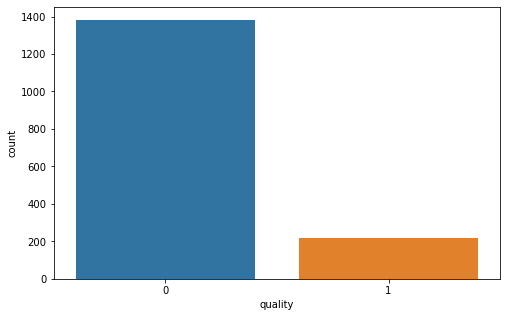

In [ ]:
import seaborn as sns
sns.countplot(x='quality',data=data)

## Independent and dependent variables

In [ ]:
X = data.drop('quality', axis=1)
y = data['quality']

In [ ]:
# # Standardizing the data
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test) # Test the prediction accurracy of the model

result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
pd.concat([result.head(), result.tail()])

,Actual,Predicted
803,0,0
124,0,0
350,0,0
682,0,0
1326,0,0
1468,1,1
495,1,1
1325,0,0
514,1,1
576,0,0


In [ ]:
from sklearn.metrics import accuracy_score
print('Testing Set Evaluation Accuracy: ',accuracy_score(y_test,y_pred))

Testing Set Evaluation Accuracy:  0.8604166666666667


In [ ]:
before_prun_accuracy = accuracy_score(y_test,y_pred)

array([[371,  42],
       [ 25,  42]], dtype=int64)

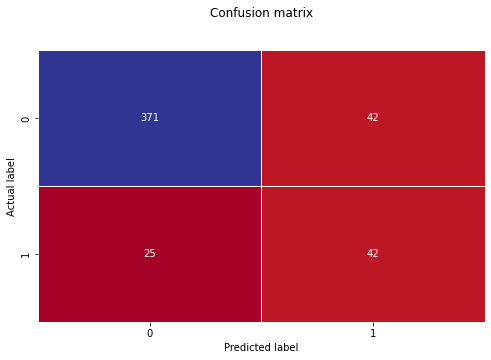

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred) # generate confusion matrix

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap='RdYlBu', linewidth=.5, fmt='g', cbar=False)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
cf_matrix

In [ ]:
from sklearn.metrics import classification_report

target_names = ['Bad Quality', 'Good Quality']
pd.DataFrame(classification_report(y_test, y_pred,target_names=target_names, output_dict=True))

,Bad Quality,Good Quality,accuracy,macro avg,weighted avg
precision,0.936869,0.500000,0.860417,0.718434,0.875889
recall,0.898305,0.626866,0.860417,0.762585,0.860417
f1-score,0.917182,0.556291,0.860417,0.736737,0.866807
support,413.000000,67.000000,0.860417,480.000000,480.000000


In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameters
param_grid = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 15))), 
    "min_samples_split":[2, 3, 4, 6, 8], 
    "min_samples_leaf":list(range(1, 15)), 
}
# training model on the define params with GridSearchCV
clf_tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(clf_tree, param_grid,scoring="accuracy",
                       n_jobs=-1, verbose=1, cv=3)

tree_cv.fit(X_train, y_train)
predictions = tree_cv.predict(X_test)
optimal_params = tree_cv.best_params_
print(f"\nOptimal paramters: ({optimal_params})")

print("\n====BEST MODEL SCORE====")
print('Best model score: ', tree_cv.best_score_)

print("\n====CLASSIFICATION REPORT====")
target_names = ['Bad Quality', 'Good Quality']
pd.DataFrame(classification_report(y_test, 
                                   predictions,
                                   target_names=target_names,
                                   output_dict=True))

Fitting 3 folds for each of 3920 candidates, totalling 11760 fits

Optimal paramters: ({'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 3, 'splitter': 'best'})

====BEST MODEL SCORE====
Best model score:  0.8954423592493298

====CLASSIFICATION REPORT====


,Bad Quality,Good Quality,accuracy,macro avg,weighted avg
precision,0.901149,0.533333,0.866667,0.717241,0.849808
recall,0.949153,0.358209,0.866667,0.653681,0.866667
f1-score,0.924528,0.428571,0.866667,0.676550,0.855301
support,413.000000,67.000000,0.866667,480.000000,480.000000


In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image

features = list(data.columns)
features.remove('quality')

In [ ]:
# !  pip install pydotplus

In [ ]:
import pydotplus


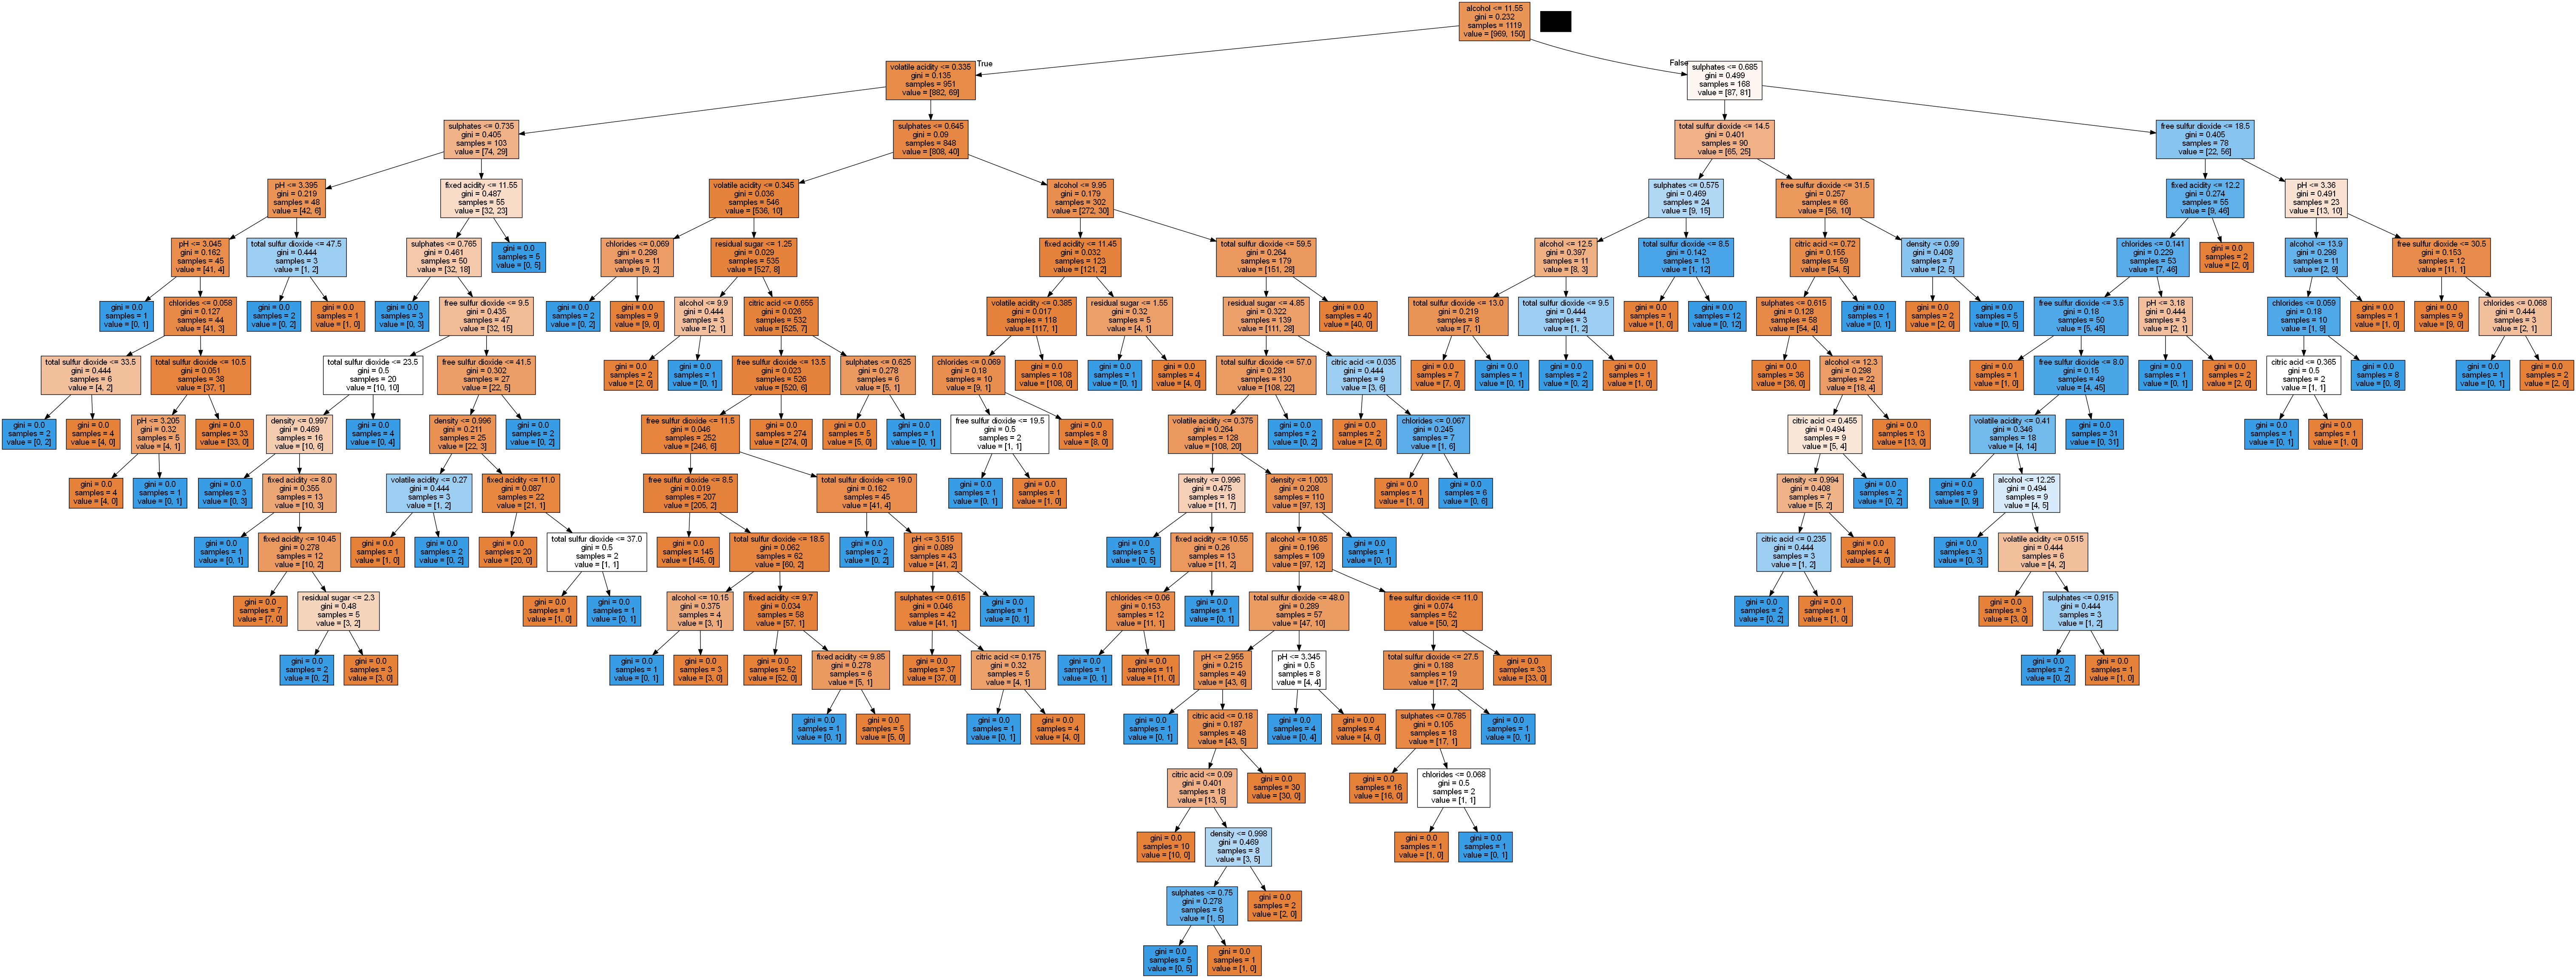

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

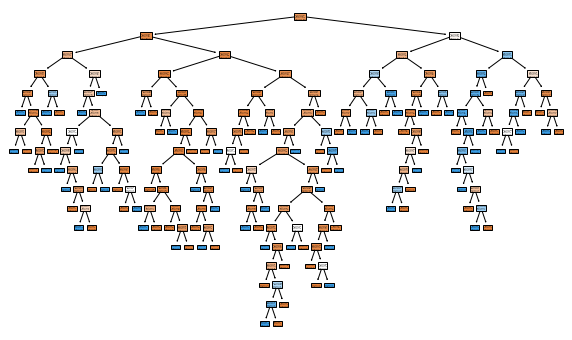

<Figure size 576x360 with 0 Axes>

In [ ]:
from sklearn import tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, filled=True)
plt.show()
plt.savefig('decision_tree_t.png')

## Pruning the decision tree

### Pre-pruning

retraining the model using the hyperparameters we found fron GridSearchCv

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', 
                             max_depth=4, 
                             splitter='best',
                             min_samples_leaf=8,
                             min_samples_split=4,
                             random_state=42
                            )

clf = clf.fit(X_train, y_train)

print('Testing Set Evaluation Accuracy: ',
      accuracy_score(y_test,clf.predict(X_test)))

Testing Set Evaluation Accuracy:  0.8666666666666667


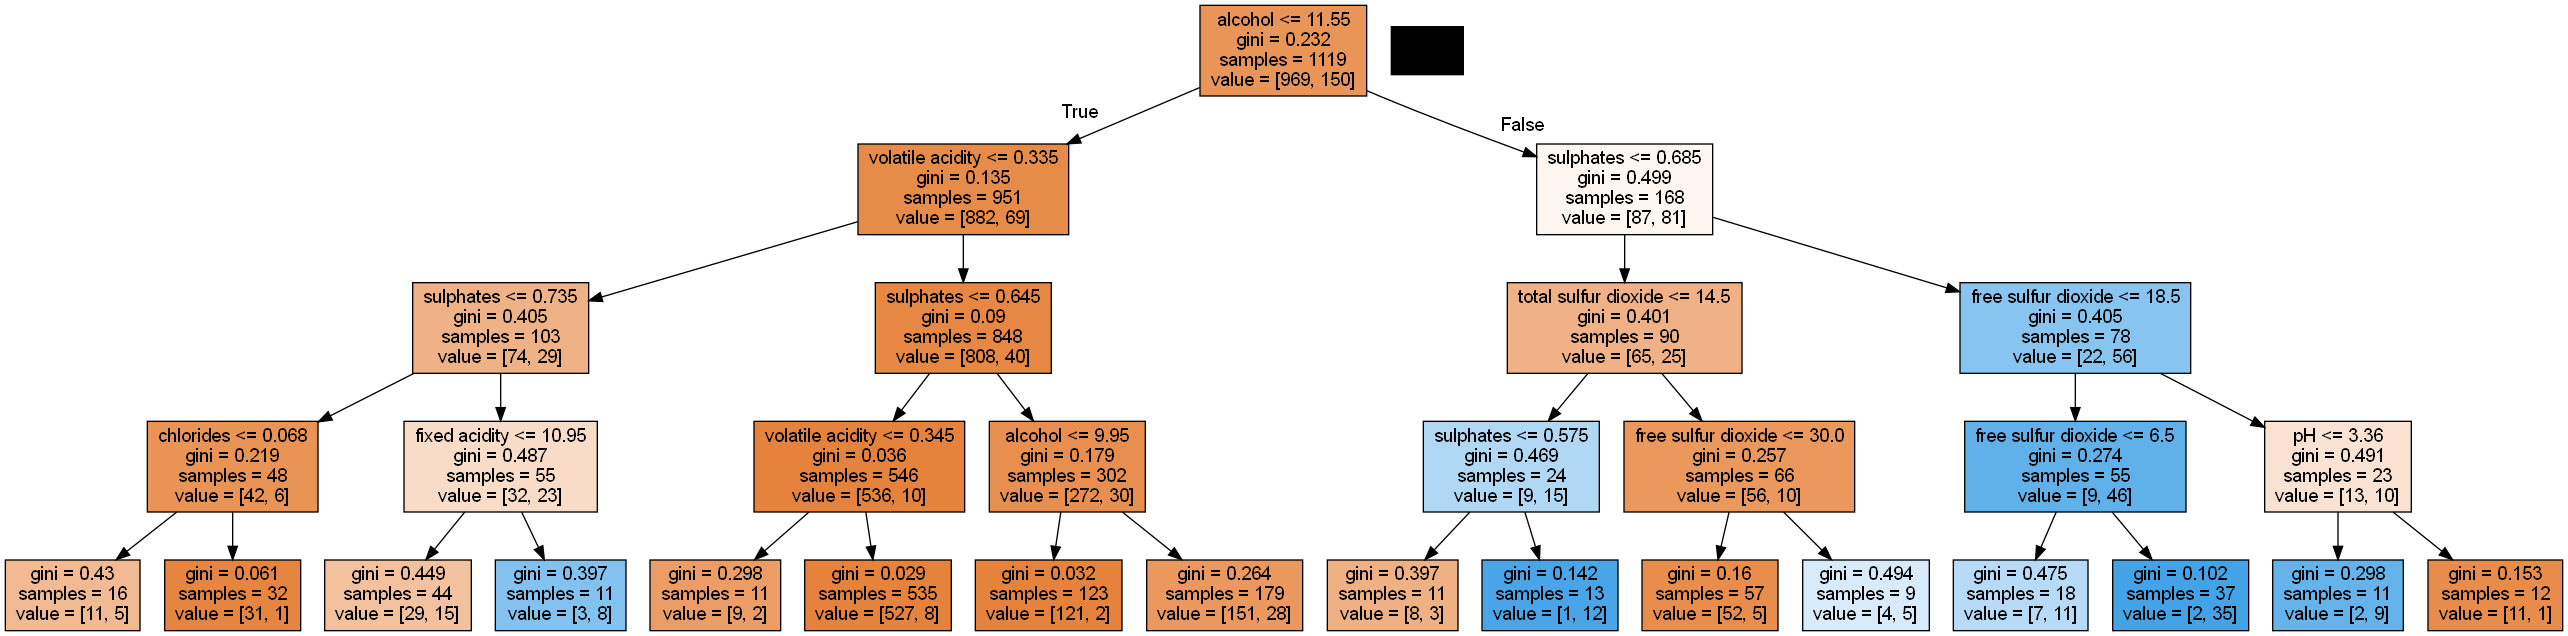

In [ ]:
# visualizing
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Post-pruning

We will us the ccp_alpha parameter of the DecisionTreeClassifier

In [ ]:
# lets retrain the model

clf = DecisionTreeClassifier(random_state=42)

clf = clf.fit(X_train, y_train)

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
ccp_alphas

array([0.        , 0.00059072, 0.00070802, 0.00080429, 0.00081918,
       0.00084401, 0.00085303, 0.00087014, 0.00087217, 0.00087238,
       0.00087456, 0.00109998, 0.00119154, 0.00119154, 0.00119154,
       0.00119154, 0.00119154, 0.00119154, 0.00131611, 0.00135402,
       0.00136176, 0.00136763, 0.00137485, 0.00139418, 0.00147727,
       0.00148943, 0.00151234, 0.00152303, 0.00153198, 0.00159116,
       0.00162432, 0.00164982, 0.00167809, 0.00173054, 0.00182089,
       0.00186178, 0.00195725, 0.00204264, 0.00234935, 0.0025533 ,
       0.00259482, 0.00285279, 0.00332765, 0.00393768, 0.00443254,
       0.00450421, 0.00510685, 0.0070522 , 0.00901793, 0.01447006,
       0.0428108 ])

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.042810798875671574


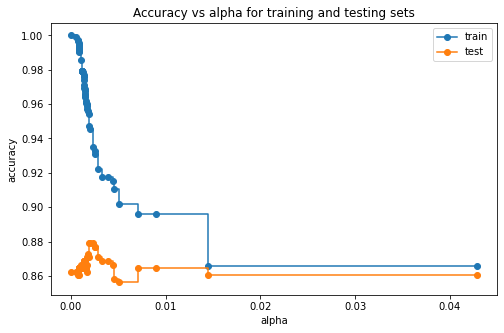

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# grid search to find the optimal value for alpha from the ccp_alphas list

clf_tree = DecisionTreeClassifier(random_state=42)
ccp_alpha_grid_search = GridSearchCV(clf_tree,
                                     param_grid=({"ccp_alpha":[alpha for alpha in ccp_alphas]}))

In [ ]:
ccp_alpha_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.0, 0.000590721134184576,
                                       0.0007080165606800428,
                                       0.0008042895442359251,
                                       0.0008191837950551088,
                                       0.0008440075464204152,
                                       0.0008530343650987087,
                                       0.0008701378110154735,
                                       0.0008721664442072701,
                                       0.0008723775479807647,
                                       0.0008745598557931006,
                                       0.0010999792285707774,
                                       0.001191540065534...
                                       0.0011915400655347036,
                                       0.0011915400655347036,
                                       0.0011915400655347036,
    

In [ ]:
print('Best parameter:' , ccp_alpha_grid_search.best_params_)

Best parameter: {'ccp_alpha': 0.009017930023689974}


In [ ]:
print('Testing Set Evaluation Accuracy: ',
      accuracy_score(y_test,clf.predict(X_test)))

Testing Set Evaluation Accuracy:  0.8604166666666667


In [ ]:
clf = DecisionTreeClassifier(ccp_alpha =0.009017930023689974, random_state=42)

clf = clf.fit(X_train, y_train)

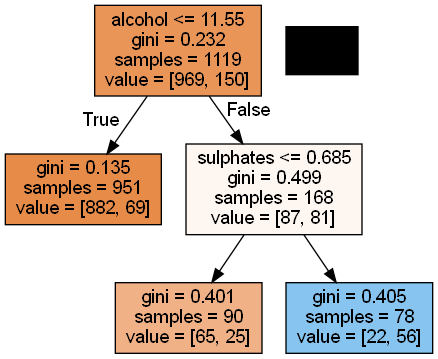

In [ ]:
# visualizing pruned tree

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Building a Random Forest

[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier)

In [ ]:
# creating a function for reuse

def eval_model_score(clf, X_train, y_train, X_test, y_test):
    y_pred = clf.predict(X_test)
    print('Testing Set Evaluation Accuracy: ',accuracy_score(y_test,y_pred))
    print("\n====CONFUSION MATRIX====\n")
    print(confusion_matrix(y_test, y_pred)) # generate confusion matrix
    print("\n====CLASSIFICATION REPORT====")
    target_names = ['Bad Quality', 'Good Quality']
    clf_report = pd.DataFrame(classification_report(y_test, y_pred, 
                                                    target_names=target_names, 
                                                    output_dict=True))
    print(clf_report)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
eval_model_score(rf_clf, X_train, y_train, X_test, y_test)

Testing Set Evaluation Accuracy:  0.89375

====CONFUSION MATRIX====

[[394  19]
 [ 32  35]]

====CLASSIFICATION REPORT====
           Bad Quality  Good Quality  accuracy   macro avg  weighted avg
precision     0.924883      0.648148   0.89375    0.786515      0.886255
recall        0.953995      0.522388   0.89375    0.738192      0.893750
f1-score      0.939213      0.578512   0.89375    0.758863      0.888866
support     413.000000     67.000000   0.89375  480.000000    480.000000


## Hyperparameter tuning for RandomForestClassifier

We use [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv#sklearn.model_selection.RandomizedSearchCV)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Provide hyperparameter grid for a random search
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num=12)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='accuracy',
                           param_distributions=random_grid, 
                           n_iter=50, cv=5, verbose=2, 
                           random_state=42, n_jobs=-1
                          )

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

eval_model_score(rf_clf, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best paramters: {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False})
Testing Set Evaluation Accuracy:  0.89375

====CONFUSION MATRIX====

[[394  19]
 [ 32  35]]

====CLASSIFICATION REPORT====
           Bad Quality  Good Quality  accuracy   macro avg  weighted avg
precision     0.924883      0.648148   0.89375    0.786515      0.886255
recall        0.953995      0.522388   0.89375    0.738192      0.893750
f1-score      0.939213      0.578512   0.89375    0.758863      0.888866
support     413.000000     67.000000   0.89375  480.000000    480.000000


In [ ]:
rf_clf = RandomForestClassifier(**rf_best_params) # pass the best parameters as **kwargs
rf_clf.fit(X_train, y_train)
eval_model_score(rf_clf, X_train, y_train, X_test, y_test)

Testing Set Evaluation Accuracy:  0.8895833333333333

====CONFUSION MATRIX====

[[394  19]
 [ 34  33]]

====CLASSIFICATION REPORT====
           Bad Quality  Good Quality  accuracy   macro avg  weighted avg
precision     0.920561      0.634615  0.889583    0.777588      0.880648
recall        0.953995      0.492537  0.889583    0.723266      0.889583
f1-score      0.936980      0.554622  0.889583    0.745801      0.883609
support     413.000000     67.000000  0.889583  480.000000    480.000000


In [ ]:
# n_estimators = [100, 500, 1000, 1500]
# max_features = ['auto', 'sqrt']
# max_depth = [2, 3, 5]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4, 10]
# bootstrap = [True, False]

# params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
#                'max_depth': max_depth, 'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

# rf_clf = RandomForestClassifier(random_state=42)

# rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=5, verbose=2, n_jobs=-1)


# rf_cv.fit(X_train, y_train)
# best_params = rf_cv.best_params_
# print(f"Best parameters: {best_params}")

## Where to go from here

Follow us on [LinkedIn](https://www.linkedin.com/company/mlnuggets), [Twitter](https://twitter.com/ml_nuggets), [GitHub](https://github.com/mlnuggets) and subscribe to our [blog](https://www.machinelearningnuggets.com/) so that you don't miss a new issue.